<a href="https://colab.research.google.com/github/Satvik256/Machine-Learning/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fastai==0.7.0 > null
!pip install scikit-learn==0.20 > null
!wget https://raw.githubusercontent.com/Giffy/Personal_dataset_repository/master/train.tar.gz
!tar xvf train.tar.gz

ERROR: torchvision 0.7.0+cu101 has requirement torch==1.6.0, but you'll have torch 0.3.1 which is incompatible.
--2020-10-09 20:53:03--  https://raw.githubusercontent.com/Giffy/Personal_dataset_repository/master/train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9126495 (8.7M) [application/octet-stream]
Saving to: ‘train.tar.gz’

train.tar.gz        100%[===================>]   8.70M  --.-KB/s    in 0.1s    

2020-10-09 20:53:03 (65.6 MB/s) - ‘train.tar.gz’ saved [9126495/9126495]

data/bulldozers/Train.csv
data/bulldozers/training_dataset
data/
data/bulldozers/


In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [ ]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
set_plot_sizes(12,14,16)

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [ ]:
PATH = "/content/data/bulldozers/"

In [ ]:
!ls {PATH}

Train.csv  training_dataset


In [ ]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
                     parse_dates=["saledate"])

In [ ]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [ ]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [ ]:
display_all(df_raw.describe(include='all').T)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaT,NaT,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaT,NaT,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaT,NaT,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaT,NaT,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaT,NaT,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaT,NaT,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaT,NaT,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaT,NaT,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17,2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [ ]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

/usr/local/lib/python3.6/dist-packages/fastai/structured.py:114: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())


0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

In [ ]:
train_cats(df_raw)

In [ ]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [ ]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [ ]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [ ]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

In [ ]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [ ]:
import feather
df_raw=feather.read_dataframe('tmp/bulldozers-raw') # replaced:  df_raw = pd.read_feather('tmp/bulldozers-raw')

In [ ]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [ ]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
m.fit(df, y)
m.score(df,y)

0.9830245889584421

In [ ]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 12000  # same as Kaggle's test set size
n_trn = len(df)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((389125, 66), (389125,), (12000, 66))

In [ ]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [ ]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 33s, sys: 115 ms, total: 1min 33s
Wall time: 48.1 s
[0.0903621405994801, 0.25084654385653987, 0.9829349389250222, 0.8876264198444734]


In [ ]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [ ]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 3.84 s, sys: 5.92 ms, total: 3.85 s
Wall time: 2.07 s
[0.11165053967799116, 0.3587109524109052, 0.9731295303671567, 0.7702067602490488]


In [ ]:
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5215606612369736, 0.5819547859613077, 0.4136414554200012, 0.3951795565191617]


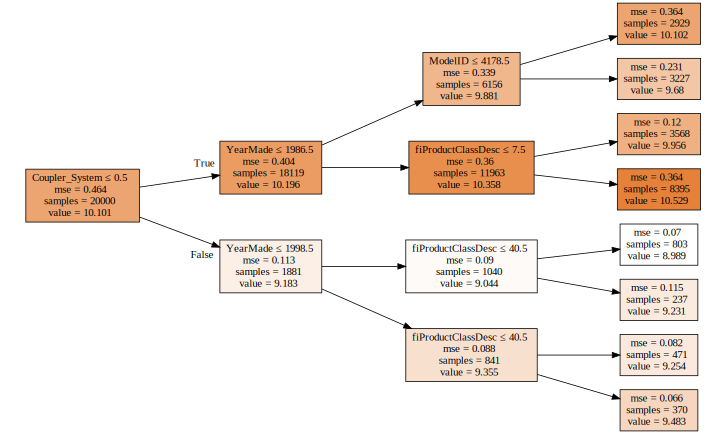

In [ ]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [ ]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[6.526751786450488e-17, 0.498810513068903, 1.0, 0.555656153294509]


In [ ]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.11178741954691088, 0.3714038405321814, 0.9730636053668639, 0.7536567001998092]


In [ ]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([9.21034, 9.10498, 9.25913, 9.18502, 9.39266, 9.74097, 9.15905, 9.10498, 9.10498, 9.51044]),
 9.277255563489241,
 9.104979856318357)

In [ ]:
preds.shape

(10, 12000)

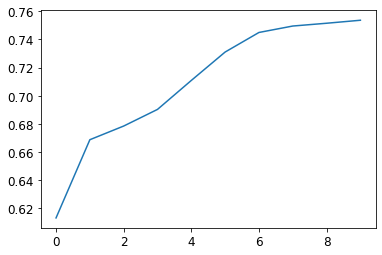

In [ ]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

In [ ]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.10142782490633474, 0.3585278039422401, 0.9778247855639635, 0.7704413532304342]


In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09583041098367738, 0.3590795597823416, 0.9802047812629655, 0.7697342516641544]


In [ ]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09342233090832913, 0.35049488125908357, 0.9811871323007302, 0.7806127756641682]


In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.09594180412858956, 0.3577492708427863, 0.9801587346432904, 0.7714372311576274, 0.8585537961099559]


In [ ]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

In [ ]:
set_rf_samples(20000)

In [ ]:
m = RandomForestRegressor(n_estimators=10, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 9.7 s, sys: 132 ms, total: 9.83 s
Wall time: 6.38 s
[0.23993940024897203, 0.28252665235642643, 0.8796799610035348, 0.8574501314617065, 0.8672104236553736]


In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.22671230307137172, 0.2619195447544609, 0.8925800357203449, 0.8774865447600688, 0.8810474475085049]


In [ ]:
reset_rf_samples()

In [ ]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [ ]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07815626407951913, 0.2369332678373285, 0.9872337775003546, 0.8997463801281519, 0.9087560429011657]


In [ ]:
t=m.estimators_[0].tree_

In [ ]:
dectree_max_depth(t)

46

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1408114146116833, 0.23449879076730826, 0.9585608776231607, 0.9017959974118996, 0.9068970930628032]


In [ ]:
t=m.estimators_[0].tree_

In [ ]:
dectree_max_depth(t)

35

In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.1150428304126498, 0.23310939794327876, 0.9723398874824548, 0.9029562569127677, 0.9085101445267186]


In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.11915133814385316, 0.22746601028714117, 0.9703289664727686, 0.9075980802065483, 0.9116951283271915]


![sklearn max_features chart](https://raw.githubusercontent.com/Giffy/fast.ai/master/Machine%20Learning/imgs/sphx_glr_plot_ensemble_oob_001.png)